# __K Nearest Neighbor Algorithm__

#### Semana 4

### __Daniela Díaz Mora__
#### consultas a daniela.diaz@sansano.usm.cl


In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set()

In [24]:
breast_cancer = load_breast_cancer()
X = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
X = X[['mean area', 'mean compactness']]
y = pd.Categorical.from_codes(breast_cancer.target, breast_cancer.target_names)
y = pd.get_dummies(y, drop_first=True)

In [25]:
X

,mean area,mean compactness
0,1001.0,0.27760
1,1326.0,0.07864
2,1203.0,0.15990
3,386.1,0.28390
4,1297.0,0.13280
...,...,...
564,1479.0,0.11590
565,1261.0,0.10340
566,858.1,0.10230
567,1265.0,0.27700


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)


In [15]:
knn = KNeighborsClassifier(n_neighbors=1, metric='euclidean')
knn.fit(X_train, y_train)

/home/daniela/miniconda3/envs/mat281/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(metric='euclidean', n_neighbors=1)

In [16]:
y_pred = knn.predict(X_test)

<AxesSubplot:xlabel='mean area', ylabel='mean compactness'>

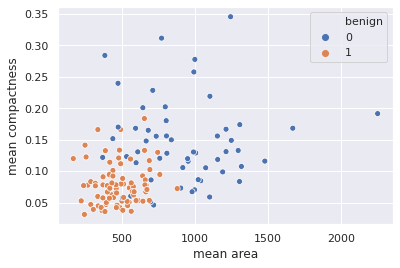

In [17]:
sns.scatterplot(
    x='mean area',
    y='mean compactness',
    hue='benign',
    data=X_test.join(y_test, how='outer')
)

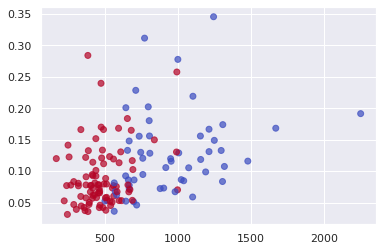

In [19]:
plt.scatter(
    X_test['mean area'],
    X_test['mean compactness'],
    c=y_pred,
    cmap='coolwarm',
    alpha=0.7
)

In [20]:
confusion_matrix(y_test, y_pred)


array([[39, 16],
       [14, 74]])